<a href="https://colab.research.google.com/github/Ni30sh/Steganography_Hiding_Information_in_the_Image/blob/main/Steganography_Hiding_Information_in_the_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [23]:
d= { chr(i): i for i in range (255)}
c= {i:chr(i) for i in range (255)}


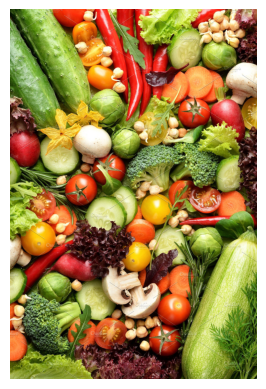

In [24]:
image_path = "/content/27f202975f0473774cd0d21067a16709.jpg"
x = cv2.imread(image_path)
xrgb= cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [25]:
x.shape

(2730, 1820, 3)

In [26]:
key= '0987'
text = 'secret'

In [27]:
#ASCII Value
text_ascii = [d[ch] for ch in text]  #value of text char
key_ascii = [d[ch] for ch in key]    # value of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[48, 57, 56, 55]


In [28]:
# encrypt using pixel modification
x_enc = x.copy()
n = 0   # row
m = 0   # column
z = 0   # color panel

l = len(text)
kl = 0
for i in range(l):
  org_val = x_enc[n,m,z]
  new_val = d[text[i]]^d[key[kl]]
  x_enc[n,m,z] = new_val

  print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val } at pixel ({n},{m},{z}) [original={org_val}]  ")

  n = n+1
  m = m+1
  m = (m+1)%3
  z = (z+1)%3

  kl = (kl+1)%len(key)



Embedding 's' (ASCII 115) XOR '0' (ASCII 48) = 67 at pixel (0,0,0) [original=0]  
Embedding 'e' (ASCII 101) XOR '9' (ASCII 57) = 92 at pixel (1,2,1) [original=38]  
Embedding 'c' (ASCII 99) XOR '8' (ASCII 56) = 91 at pixel (2,1,2) [original=27]  
Embedding 'r' (ASCII 114) XOR '7' (ASCII 55) = 69 at pixel (3,0,0) [original=0]  
Embedding 'e' (ASCII 101) XOR '0' (ASCII 48) = 85 at pixel (4,2,1) [original=27]  
Embedding 't' (ASCII 116) XOR '9' (ASCII 57) = 77 at pixel (5,1,2) [original=15]  


In [29]:
cv2.imwrite('encrypted_image.jpg',x_enc)

True

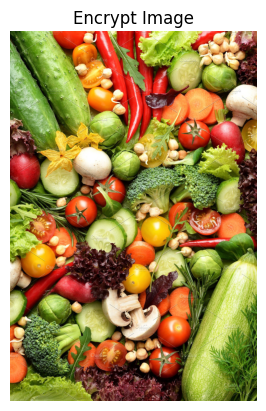

In [30]:
xrgb1 = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb1)
plt.title('Encrypt Image')
plt.axis('off')
plt.show()

In [31]:
# Decrypt
n,m,z = 0,0,0
kl = 0
decrypt = ""
for i in range(l):
  val = x_enc[n,m,z]
  org_char = c[val^d[key[kl]]]
  decrypt = decrypt + org_char
  print(f"Decrypting pixel ({n}, {m}, {z}): {val} XOR {d[key[kl]]}  = {val ^ d[key[kl]]} -> '{org_char}' ")

  n = n+1
  m = m+1
  m = (m+1)%3
  z = (z+1)%3
  kl = (kl+1)%len(key)
print(decrypt)

Decrypting pixel (0, 0, 0): 67 XOR 48  = 115 -> 's' 
Decrypting pixel (1, 2, 1): 92 XOR 57  = 101 -> 'e' 
Decrypting pixel (2, 1, 2): 91 XOR 56  = 99 -> 'c' 
Decrypting pixel (3, 0, 0): 69 XOR 55  = 114 -> 'r' 
Decrypting pixel (4, 2, 1): 85 XOR 48  = 101 -> 'e' 
Decrypting pixel (5, 1, 2): 77 XOR 57  = 116 -> 't' 
secret
